---
EDA
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

In [2]:
df = pd.read_csv('city_clients.csv')
df.head(15)

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,NaN,NaN,NaN,...,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.00,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,NaN,NaN,NaN,...,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.00,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.880000,2.0,...,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.00,457.0
3,695174271,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.00,292.0
4,843828836,1,NaN,NaN,NaN,NaN,NaN,1687.82,1687.820000,1.0,...,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.00,528.0
5,368255067,1,80070.20,2582.909677,31.0,2022-08-05,2024-10-17,NaN,NaN,NaN,...,0.0,331.0,0.0,331.0,0.0,331.0,0.0,331.0,209189.56,331.0
6,313612161,1,NaN,NaN,NaN,NaN,NaN,2256.00,2256.000000,1.0,...,0.0,282.0,0.0,282.0,1101.0,282.0,0.0,282.0,0.00,282.0
7,596965562,1,NaN,NaN,NaN,NaN,NaN,123856.94,1935.264688,64.0,...,0.0,329.0,0.0,329.0,2274.0,329.0,0.0,329.0,0.00,329.0
8,380761555,1,19289.48,2143.275556,9.0,2021-10-09,2024-08-24,30037.90,1430.376190,21.0,...,0.0,575.0,0.0,575.0,0.0,575.0,0.0,575.0,50270.00,575.0
9,946222843,1,8797.22,1466.203333,6.0,2024-03-07,2024-04-14,NaN,NaN,NaN,...,0.0,153.0,0.0,153.0,0.0,153.0,0.0,153.0,0.00,153.0


Сначала сделаем аналитику для нескольких категориальных признаков.

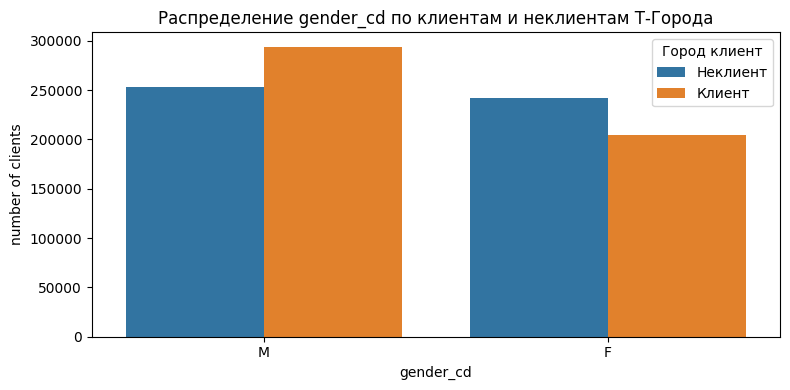

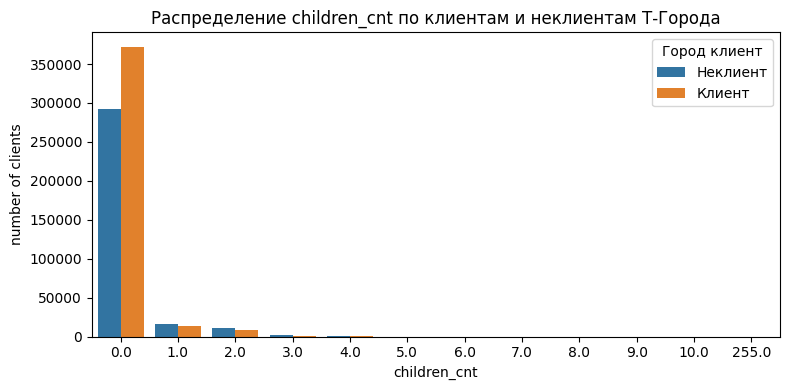

In [3]:
cat_features = ['gender_cd', 'children_cnt']
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='gorod_client_flg')
    plt.title(f'Распределение {col} по клиентам и неклиентам Т-Города')
    plt.ylabel('number of clients')
    plt.xlabel(col)
    plt.legend(title='Город клиент', labels=['Неклиент', 'Клиент'])
    plt.tight_layout()
    plt.show()

In [4]:
gender_ratio = df.groupby('gender_cd')['gorod_client_flg'].mean()
gender_ratio

gender_cd
F    0.458589
M    0.537124
Name: gorod_client_flg, dtype: float64

In [5]:
children_table = df.groupby(['children_cnt', 'gorod_client_flg']).size().unstack(fill_value=0)
children_table['total'] = children_table.sum(axis=1)
children_table

gorod_client_flg,0,1,total
children_cnt,,,
0.0,291954,372124,664078
1.0,15726,13221,28947
2.0,10404,8184,18588
3.0,2263,1318,3581
4.0,531,264,795
5.0,52,21,73
6.0,75,28,103
7.0,6,3,9
8.0,9,6,15


In [6]:
df[df['children_cnt'] == 255]

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
984662,561444504,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,22.0,0.0,22.0,0.0,22.0,0.0,22.0,0.0,22.0


In [7]:
df = df[df['children_cnt'] != 255]

Разница по полу заметна, хотя она не очень большая, но процент мужчин, использующих город больше практически на 10%.  
По распределению для количества детей видно, что люди, которые не имеют детей (кажется) практичеки никогда не являются клиентами Т-банка (или просто людей с детьми так мало)?
Плюс выкидываю человека с 255 детьми из df, это явно какая-то ошибка.

In [8]:
map_df = gpd.read_file('gadm41_RUS_1.json')

In [9]:
region_dict = {
    1: 'adygey',
    2: 'bashkortostan',
    3: 'buryat',
    4: 'altay',
    5: 'dagestan',
    6: 'ingush',
    7: 'kabardin-balkar',
    8: 'kalmyk',
    9: 'karachay-cherkess',
    10: 'karelia',
    11: 'komi',
    12: 'mariy-el',
    13: 'mordovia',
    14: 'sakha',
    15: 'northossetia',
    16: 'tatarstan',
    17: 'tuva',
    18: 'udmurt',
    19: 'khakass',
    21: 'chuvash',
    22: 'altay',
    23: 'krasnodar',
    24: 'krasnoyarsk',
    25: "primor'ye",
    26: "stavropol'",
    27: 'khabarovsk',
    28: 'amur',
    29: "arkhangel'sk",
    30: "astrakhan'",
    31: 'belgorod',
    32: 'bryansk',
    33: 'vladimir',
    34: 'volgograd',
    35: 'vologda',
    36: 'voronezh',
    37: 'ivanovo',
    38: 'irkutsk',
    39: 'kaliningrad',
    40: 'kaluga',
    41: 'kamchatka',
    42: 'kemerovo',
    43: 'kirov',
    44: 'kostroma',
    45: 'kurgan',
    46: 'kursk',
    47: 'leningrad',
    48: 'lipetsk',
    49: 'magadan',
    50: 'moskva',          # Московская область
    51: 'murmansk',
    52: 'nizhegorod',
    53: 'novgorod',
    54: 'novosibirsk',
    55: 'omsk',
    56: 'orenburg',
    57: 'orel',
    58: 'penza',
    59: "perm'",
    60: 'pskov',
    61: 'rostov',
    62: "ryazan'",
    63: 'samara',
    64: 'saratov',
    65: 'sakhalin',
    66: 'sverdlovsk',
    67: 'smolensk',
    68: 'tambov',
    69: "tver'",
    70: "tomsk",
    71: 'tula',
    72: "tyumen'",
    73: "ul'yanovsk",
    74: 'chelyabinsk',
    75: "zabaykal'ye",
    76: "yaroslavl'",
    77: 'moscowcity',      # Москва
    78: 'cityofst.petersburg', # Санкт-Петербург
    79: 'yevrey',
    83: 'nenets',
    86: 'khanty-mansiy',
    87: 'chukot',
    89: 'yamal-nenets',
    82: 'crimea',          # Республика Крым
    92: 'sevastopol'
}


In [10]:
df['region_code'] = pd.to_numeric(df['region'], errors='coerce').astype('Int64')
df['region_name'] = df['region_code'].map(region_dict)
df['region_name'] = df['region_name'].fillna('Unknown')

In [11]:
clients_region = df.groupby('region_name')['gorod_client_flg'].mean().reset_index()
clients_region.columns = ['region_name', 'client_ratio']

clients_region['region_name'] = clients_region['region_name'].fillna('unknown').astype(str).str.strip().str.lower()
map_df['NAME_1'] = map_df['NAME_1'].astype(str).str.strip().str.lower()

map_merged = map_df.merge(clients_region, left_on='NAME_1', right_on='region_name', how='left')

In [12]:
m = folium.Map(location=[61, 105], zoom_start=3)

folium.Choropleth(
    geo_data=map_merged,
    name='choropleth',
    data=map_merged,
    columns=['NAME_1', 'client_ratio'],
    key_on='feature.properties.NAME_1',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name='Доля клиентов Т-Город'
).add_to(m)

folium.GeoJson(
    map_merged,
    style_function=lambda feature: {'fillColor': 'transparent', 'color':'transparent'},
    tooltip=GeoJsonTooltip(fields=['NAME_1','client_ratio'],
                           aliases=['Регион','Доля клиентов'],
                           localize=True)
).add_to(m)

m.save('gorod_clients_map.html')


![Диаграмма без названия.drawio (3).png](<attachment:Диаграмма без названия.drawio (3).png>)

Карта распределения клиентов ожидаемая: наибольшая доля пользователей приходится в густонаселённых районах, в менее населённых местах доля клиентов ниже.

In [13]:
age_table = df.groupby('age')['gorod_client_flg'].agg(['count', 'mean']).rename(columns={'count':'total', 'mean':'client_ratio'})
age_table['client_ratio'] = age_table['client_ratio']

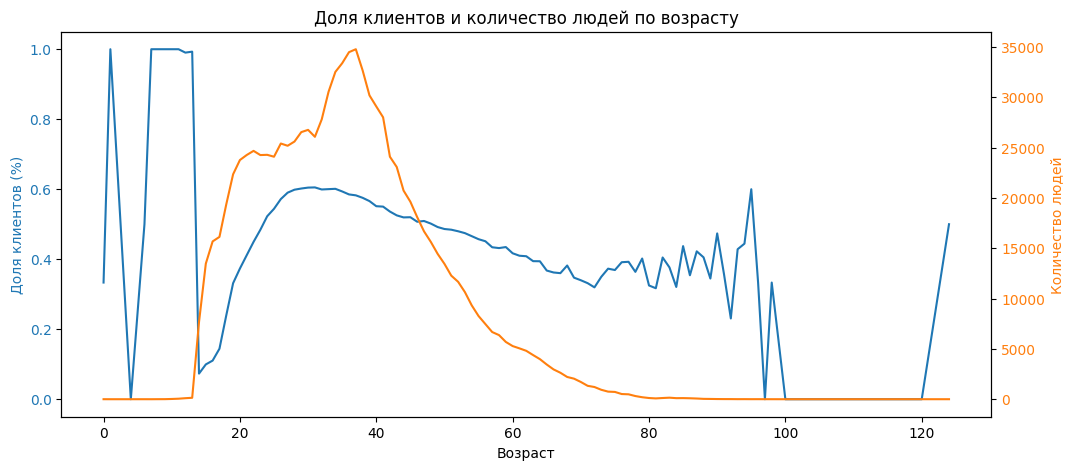

In [14]:
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Доля клиентов (%)', color=color)
sns.lineplot(x=age_table.index, y='client_ratio', data=age_table, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Количество людей', color=color)
sns.lineplot(x=age_table.index, y='total', data=age_table, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Доля клиентов и количество людей по возрасту')
plt.show()


Я буду рассматривать возрастные группы младше 16, 60-65 и старше 65, так как данных недостаточно для анализа каждого возраста.

In [15]:
def age_category(age):
    if age < 16:
        return 'до 16'
    elif 60 <= age <= 65:
        return '60-65'
    elif age > 65:
        return '65+'
    return age

df['age_group'] = df['age'].apply(age_category)

In [16]:
age_table_1 = (
    df.groupby('age_group')['gorod_client_flg']
    .agg(['count', 'mean'])
    .rename(columns={'count':'total', 'mean':'client_ratio'})
)
order = (
    ['до 16'] +
    sorted([x for x in age_table_1.index if isinstance(x, int)]) +
    ['60-65', '65+']
)
age_table_1 = age_table_1.reindex(order)

In [17]:
age_table_1

,total,client_ratio
age_group,,
до 16,21489,0.104332
60-65,26967,0.400823
65+,19067,0.358263


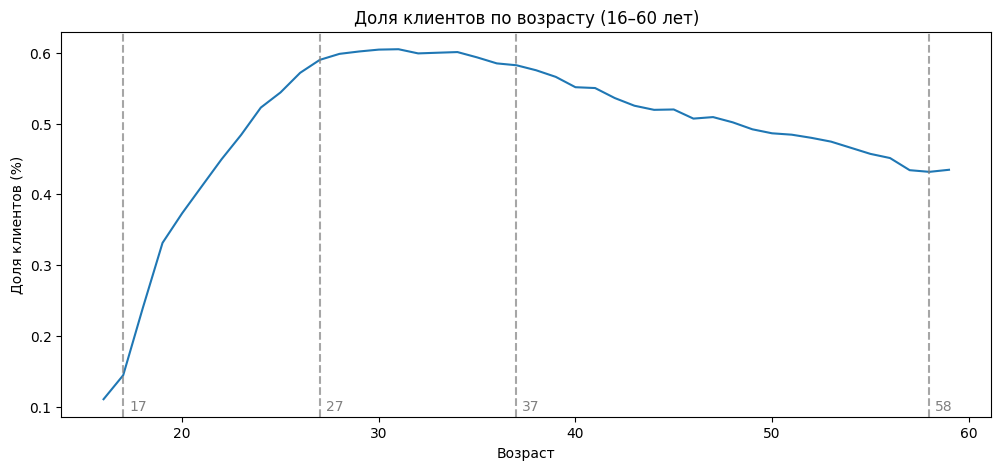

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
mask = (age_table.index >= 16) & (age_table.index < 60)

color = 'tab:blue'
ax.set_xlabel('Возраст')
ax.set_ylabel('Доля клиентов (%)')

sns.lineplot(x=age_table.index[mask], y=age_table['client_ratio'][mask], ax=ax, color=color)
ax.tick_params(axis='y')

for age in [17, 27, 37, 58]:
    ax.axvline(x=age, color='gray', linestyle='--', alpha=0.7)
    ax.text(age+0.3, ax.get_ylim()[1]*0.15, str(age), color='gray')

plt.title('Доля клиентов по возрасту (16–60 лет)')
plt.show()


Снижение количества пользователей города с возрастом разумно, но удивительно, что молодые люди практически не пользуются сервисом.

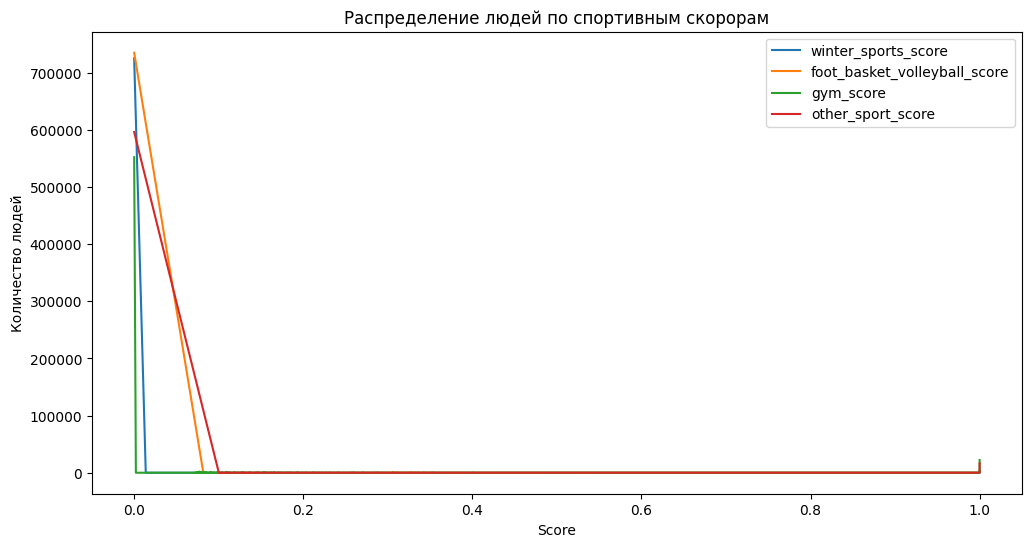

In [19]:
sport_cols = ['winter_sports_score','foot_basket_volleyball_score','gym_score','other_sport_score']

plt.figure(figsize=(12,6))

for col in sport_cols:
    counts = df[col].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=col)

plt.xlabel('Score')
plt.ylabel('Количество людей')
plt.title('Распределение людей по спортивным скорорам')
plt.legend()
plt.show()


Кажется признаки про спорт кроме последнего совершенно неинтересные.

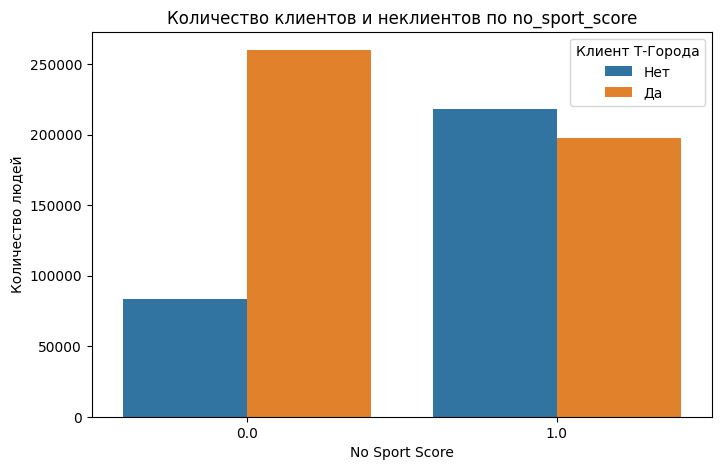

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='no_sport_score', hue='gorod_client_flg')
plt.xlabel('No Sport Score')
plt.ylabel('Количество людей')
plt.title('Количество клиентов и неклиентов по no_sport_score')
plt.legend(title='Клиент Т-Города', labels=['Нет', 'Да'])
plt.show()

Для спортивных людей гораздо более типично быть клиентом города, чем для неспортивных людей.

In [21]:
table = df.groupby(['no_sport_score', 'gorod_client_flg']).size().unstack(fill_value=0)

table_percent = table.div(table.sum(axis=1), axis=0)
table_percent = table_percent.rename(columns={0:'Не клиент', 1:'Клиент'})

table_percent

gorod_client_flg,Не клиент,Клиент
no_sport_score,,
0.0,0.242388,0.757612
1.0,0.525228,0.474772


Слишком удивительный результат, мне кажется должна быть корреляция между занятием/не занятием спортом с каким-то важным очевидным признаком вроде возраста.

In [22]:
# Пирсон
num_features = ['age', 'children_cnt', 'books_score', 
                'no_pet_score', 'personal_auto_score']

corr_with_client = df[num_features + ['no_sport_score']].corr()['no_sport_score'].sort_values(ascending=False)
corr_with_client

no_sport_score         1.000000
no_pet_score           0.329344
children_cnt           0.048190
age                   -0.043554
books_score           -0.111267
personal_auto_score   -0.287473
Name: no_sport_score, dtype: float64

Есть связь с no_pet_score и personal_auto_score, но возрастом корреляции нет.

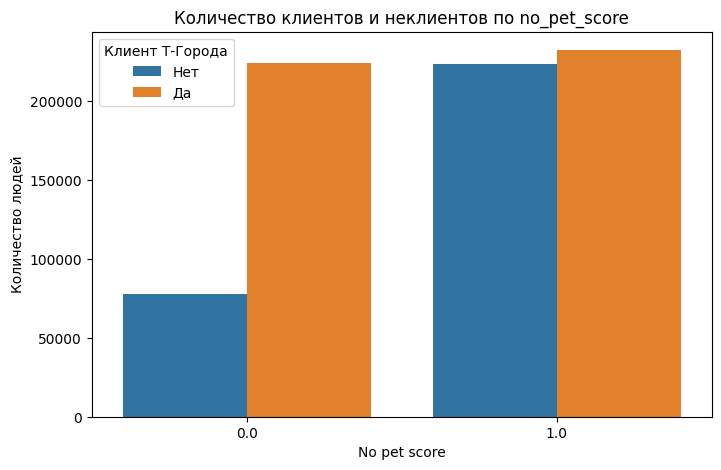

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='no_pet_score', hue='gorod_client_flg')
plt.xlabel('No pet score')
plt.ylabel('Количество людей')
plt.title('Количество клиентов и неклиентов по no_pet_score')
plt.legend(title='Клиент Т-Города', labels=['Нет', 'Да'])
plt.show()

In [24]:
# Пирсон
num_features = ['age', 'children_cnt', 'books_score', 
                'no_sport_score', 'personal_auto_score']

corr_with_client = df[num_features + ['no_pet_score']].corr()['no_pet_score'].sort_values(ascending=False)
corr_with_client

no_pet_score           1.000000
no_sport_score         0.329344
children_cnt           0.042147
age                   -0.081983
books_score           -0.116568
personal_auto_score   -0.225437
Name: no_pet_score, dtype: float64

Практически аналогичнно.

In [ ]:
df['books_bin'] = (df['books_score'] // 0.05) * 0.05
books_table = df.groupby('books_bin', observed=True)['gorod_client_flg'].agg(['mean', 'count']).reset_index()
books_table.rename(columns={'mean':'client_ratio', 'count':'total'}, inplace=True)

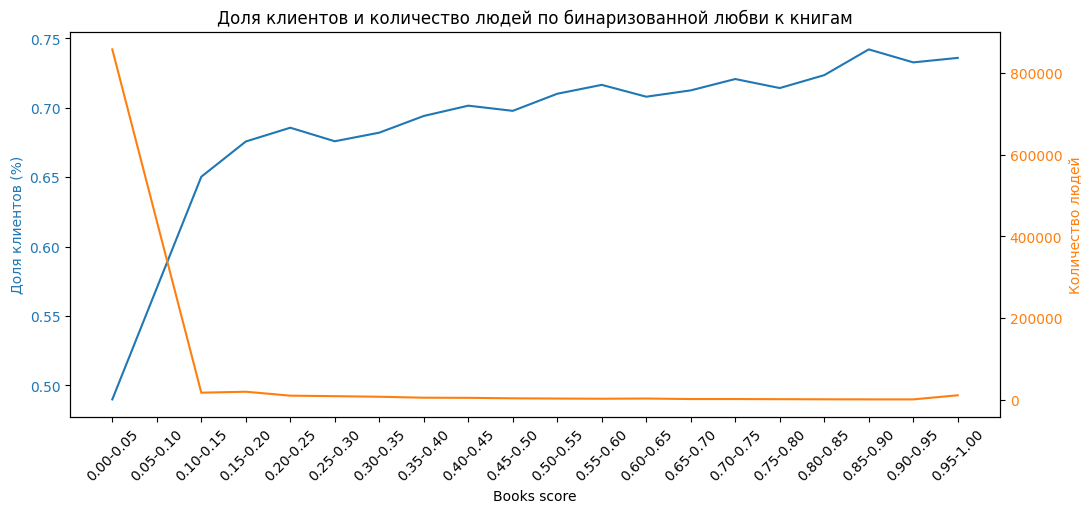

In [46]:
fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.set_xlabel('Books score')
plt.xticks(rotation=45)
ax1.set_ylabel('Доля клиентов (%)', color=color)
sns.lineplot(x='books_bin', y='client_ratio', data=books_table, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Количество людей', color=color)
sns.lineplot(x='books_bin', y='total', data=books_table, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Доля клиентов и количество людей по бинаризованной любви к книгам')
plt.show()


In [54]:
df['books_cat'] = df['books_score'].apply(lambda x: 'low' if x == 0 else 'high')
books_cat_table = df.groupby(['books_cat', 'gorod_client_flg']).size().unstack(fill_value=0)

books_cat_table['total'] = books_cat_table.sum(axis=1)
books_cat_table['ratio'] = books_cat_table[0] / books_cat_table['total']

books_cat_table[['total', 'ratio']]

gorod_client_flg,total,ratio
books_cat,,
high,141909,0.438845
low,858090,0.510113


Почти у всех книжный скор нулевой.

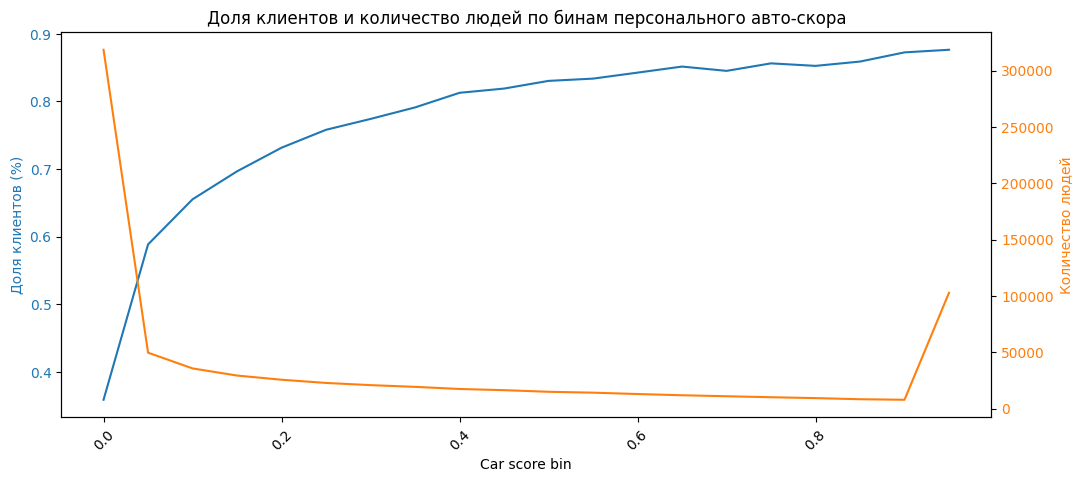

In [ ]:
df['car_bin'] = (df['personal_auto_score'] // 0.05) * 0.05

car_table = df.groupby('car_bin', observed=True)['gorod_client_flg'].agg(['mean', 'count']).reset_index()
car_table.rename(columns={'mean':'client_ratio', 'count':'total'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.set_xlabel('Car score bin')
plt.xticks(rotation=45)
ax1.set_ylabel('Доля клиентов (%)', color=color)
sns.lineplot(x='car_bin', y='client_ratio', data=car_table, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Количество людей', color=color)
sns.lineplot(x='car_bin', y='total', data=car_table, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Доля клиентов и количество людей по бинам персонального авто-скора')
plt.show()


In [56]:
extreme_car_table = car_table[(car_table['car_bin'] < 0.1) | (car_table['car_bin'] >= 0.90)]
extreme_car_table = extreme_car_table.rename(columns={'car_bin': 'car_score_bin', 'client_ratio': 'client_ratio', 'total': 'total_count'})
extreme_car_table

,car_score_bin,client_ratio,total_count
0,0.00,0.358489,318517
1,0.05,0.588298,49650
18,0.90,0.872370,7843
19,0.95,0.876234,102823


Люди с низким скором очень гораздо реже являются клиентами, чем люди скорее всего имеющие машину.

Из всех категорий трат посмотрим только на те, которые относятся к основным в городе и в общем.

In [63]:
spending_cols = [
    'aviabilety_gmv', 'zh_d_bilety_gmv', 'oteli_gmv', 'arenda_avto_gmv',
    'turagentstva_gmv', 'toplivo_gmv', 'supermarkety_gmv', 'restorany_gmv',
    'fast_fud_gmv', 'odezhda_obuv_gmv', 'razvlechenija_gmv', 'obrazovanie_gmv',
    'svjaz_telekom_gmv', 'iskusstvo_gmv', 'kino_gmv', 'knigi_gmv', 'zhivotnye_gmv',
    'dom_remont_gmv'
]

df['total_spending'] = df[spending_cols].sum(axis=1)

spending_summary = df.groupby('gorod_client_flg')['total_spending'].agg(['mean', 'median', 'count']).reset_index()
spending_summary

,gorod_client_flg,mean,median,count
0,0,46504.326462,14425.11,499999
1,1,131966.024497,87746.75,500000


Видимо многие клиенты Т-банка являются его "побочным" клиентом, т.е. имеют карту, но практически ей не пользуются, не пользуясь и городом тоже.

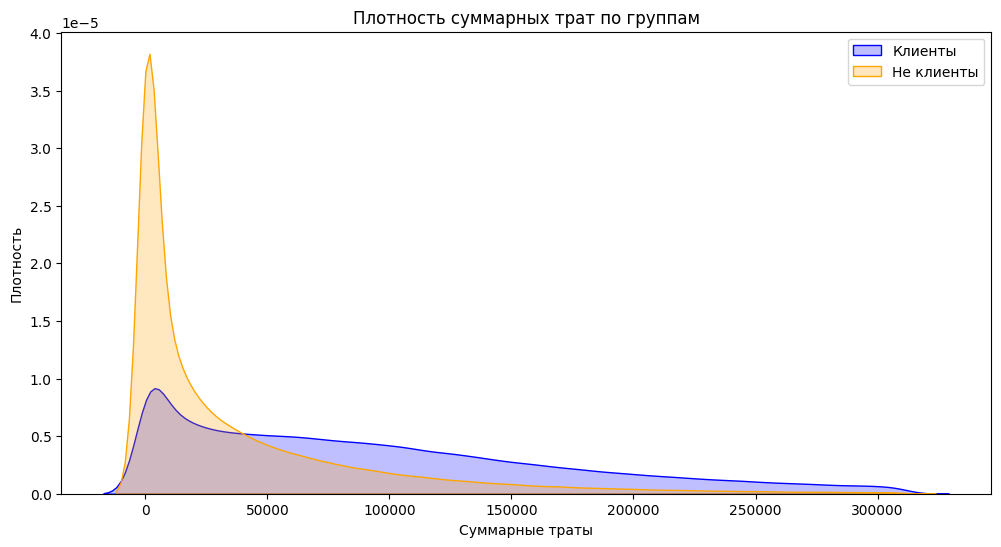

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

max_val = df['total_spending'].quantile(0.95)

clients = df[(df['gorod_client_flg'] == 1) & (df['total_spending'] <= max_val)]['total_spending']
non_clients = df[(df['gorod_client_flg'] == 0) & (df['total_spending'] <= max_val)]['total_spending']

plt.figure(figsize=(12,6))
sns.kdeplot(clients, label='Клиенты', color='blue', fill=True)
sns.kdeplot(non_clients, label='Не клиенты', color='orange', fill=True)
plt.xlabel('Суммарные траты')
plt.ylabel('Плотность')
plt.title('Плотность суммарных трат по группам')
plt.legend()
plt.show()


In [66]:
df['art_cinema_share'] = (df['iskusstvo_gmv'] + df['kino_gmv']) / df['total_spending']

art_cinema_table = df.groupby('gorod_client_flg')['art_cinema_share'].agg(['mean','median','count']).reset_index()
art_cinema_table

,gorod_client_flg,mean,median,count
0,0,0.004572,0.0,402348
1,1,0.004037,0.0,478877


In [67]:
df['toplivo'] = (df['toplivo_gmv']) / df['total_spending']

art_cinema_table = df.groupby('gorod_client_flg')['toplivo'].agg(['mean','median','count']).reset_index()
art_cinema_table

,gorod_client_flg,mean,median,count
0,0,0.049313,0.000000,402348
1,1,0.139071,0.072635,478877


In [68]:
df['supermarkety'] = (df['supermarkety_gmv']) / df['total_spending']

art_cinema_table = df.groupby('gorod_client_flg')['supermarkety'].agg(['mean','median','count']).reset_index()
art_cinema_table

,gorod_client_flg,mean,median,count
0,0,0.556096,0.574408,402348
1,1,0.421545,0.413203,478877


Связи с тратами на развлечения нет, на топливо есть (но она, кажется, объясняется просто наличием или отсутствием машины, это было выше), с супермаркетами есть обратная связь.

In [69]:
# Пирсон для вещественных признаков
num_features = ['age', 'children_cnt', 'books_score', 
                'no_pet_score', 'personal_auto_score', 'no_sport_score', 'total_spending']

corr_with_client = df[num_features + ['gorod_client_flg']].corr()['gorod_client_flg'].sort_values(ascending=False)
corr_with_client

gorod_client_flg       1.000000
personal_auto_score    0.394375
total_spending         0.223983
books_score            0.109077
age                    0.052999
children_cnt          -0.061381
no_pet_score          -0.232465
no_sport_score        -0.287667
Name: gorod_client_flg, dtype: float64

---
Гипотезы
---

1. Таргетированная акция на спортивные товары/услуги для спортивных людей увеличит конверсию среди тех, кто ещё не пользуется продуктом.  
Для спортивных людей типично использовать город. Если в городе будет кэшбек на оплату абонемента в зал, то часть спортивных людей, которые им не пользовались, могут стать клиентами. Или если сделать таргетированную акцию/рекламу для спортивных людей (например, через спортивные магазины), часть тех, кто ещё не пользуется городом, может заинтересоваться.

2. Расширение функционала приложения для автомобилистов, например возможность оплаты парковки, потенциально повысит конверсию среди пользователей, которые ещё не являются клиентами.  
Наличие автомобиля коррелирует с тем, что человек является клиентом. Добавление новых функций для автомобилистов, например возможность оплатить парковку в центре Москвы не выходя из машины или возможность купить страховку в приложении может привлечь новых клиентов в город (и скорее всего и в банк тоже).

3. Внедрение пошаговых туториалов по заказу продуктов в приложении и целевая реклама через телевизионные каналы повысит их вовлечённость пожилых пользователей и их конверсию в клиентов.  
С возрастом процент пользователей города от общего числа клиентов банка уменьшается. Если внедрить в приложение очень простые пошаговые туториалы по заказу продуктов, пожилые люди смогут самостоятельно учиться онлайн-шопингу и становиться клиентами города. Также таргетированная реклама на ТВ (или в брошюрах Московского долголетия) потенциально может привлечь новых клиентов из аудитории 60+.


На мой взгляд самая перспективная гипотеза №2, т.к.:  
1. Показатель personal_auto_score имеет самую высокую корреляцию с таргетным признаком. То есть наличие автомобиля довольно сильно повышает вероятность оказаться клиентом города.  
2. Автомобиль это затратный ресурс, поэтому отдача от одного пользователя может быть выше, чем от пользователей других категорий.  
3. Большая аудитория. Потенциально автомобилистов очень много, и  можно привлечь много новых клиентов.  
4. Новые функции легко внедрить в приложение. Например, спортивность бывает очень разной и для разных людей требуются разные функции, а для автомобилистов требуются примерно однаковые сервисы (парковка, серсисы, страховка).  

---
Попытка оценить долю рынка
---

По автомобилям  
Я найду в интернете оценки скачиваний приложений аналогичной специфики и буду считать сумму загрузок рынком (это очень губая оценка, но без достоверных данных сложно сделать лучше).
 - Газпромнефть (АЗС) - 3 млн rustore
 - Яндекс Заправки - 1 млн google play, 1 млн rustore
 - АЗС Роснефть - 1 млн rustore, 1 млн google play
 - Лукоил - 10 млн google play, 2 млн rustore
 - Татнефть - 1 млн google play, 0.5 млн rustore

Про AppStore нет статистики, но т.к. в России примерно 40% людей имеют айфоны, результат разделим на 0,6.  
В Т-банке 50 млн клиетов, я считаю что в df репрезентатвная выборка, поэтому процент пользователей города хоть раз плативших за топливо умножу на количество всех пользователей.

In [81]:
not_g = ((3 + 2 + 2 + 12 + 1.5) / 0.6) * (10 ** 6)

In [84]:
not_g

34166666.66666667

In [82]:
numerator = df[(df['gorod_client_flg'] == 1) & (df['fuel_n_orders'] > 0)].shape[0]
denominator = df.shape[0]
gorod_ratio = numerator / denominator
gorod = 50 * (10**6) * gorod_ratio

In [85]:
gorod

18698568.698568698

In [ ]:
gorod / (gorod + not_g) # получившаяся доля рынка

0.3537025527151069